In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install funpymodeling
!pip install tensorflow

import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

import seaborn as sns
sns.set(style="ticks", color_codes=True, font_scale=1.5)

from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

import tensorflow as tf
from tensorflow import keras

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils.vis_utils import plot_model
from funpymodeling.exploratory import status, freq_tbl, profiling_num

dataset = pd.read_csv('/content/drive/MyDrive/ADD2021/weatherAUS.csv')

     |████████████████████████████████| 225kB 35.2MB/s 
  Found existing installation: seaborn 0.11.1
    Uninstalling seaborn-0.11.1:
      Successfully uninstalled seaborn-0.11.1


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Analisis básico de datos

**1) Visualizar las primeras filas.**

In [3]:
#visualizo las primeras filas del dataset
dataset.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
dataset.shape

(145460, 23)

**2) Identificar los tipos de datos: categórico, ordinal, etc. Responder para cada variable su tipo y si es informativa para un problema de clasificación (por ejemplo si se trata de un código, como una matrícula, o un nombre propio).**

In [5]:
#identifico el tipo de datos de cada columna y la cantidad de registros sin nulls
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [6]:
#veo la cantidad de nans de cada columna, porcentaje de nans, cantidad de valores 0 que hay, y los valores unicos 
status (dataset)


,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,Date,0,0.000000,0,0.000000,3436,object
1,Location,0,0.000000,0,0.000000,49,object
2,MinTemp,1485,0.010209,159,0.001093,389,float64
3,MaxTemp,1261,0.008669,14,0.000096,505,float64
4,Rainfall,3261,0.022419,91080,0.626152,681,float64
5,Evaporation,62790,0.431665,244,0.001677,358,float64
6,Sunshine,69835,0.480098,2359,0.016218,145,float64
7,WindGustDir,10326,0.070989,0,0.000000,16,object
8,WindGustSpeed,10263,0.070555,0,0.000000,67,float64
9,WindDir9am,10566,0.072639,0,0.000000,16,object


In [7]:

nans = dataset.loc[dataset.isna().sum(axis=1) >= 1, :]
print('Cantidad de filas con nans {}'.format(nans.shape))

not_nans = dataset.loc[dataset.isna().sum(axis=1) == 0, :]
print('Cantidad de filas sin nans {}'.format(not_nans.shape))


Cantidad de filas con nans (89040, 23)
Cantidad de filas sin nans (56420, 23)


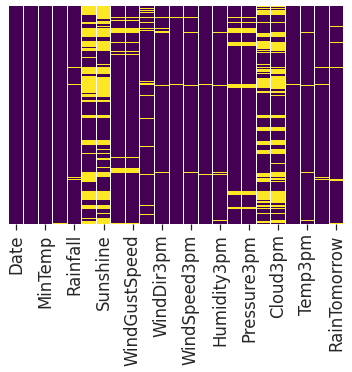

In [8]:
#visualizo los nans
sns.heatmap(dataset.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [9]:
#obtengo las estadisticas basicas de cada una de las columnas
dataset.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


***Conclusiones primer analisis***: Las variables categoricas en primera instancia son Date, Location, WindGustDir, WindDir9am, WindDir3pm, RainToday.
La variable a predecir es RainTomorrow (variable de salida) y las demas variables son numericas.
Todas las variables menos la variable a predecir (RainTomorrow) son input para el modelo (variables de entrada)

 ***3) Realizar los siguientes análisis por tipo de
variable.***

**Numéricas**: Obtener conclusiones acerca de la distribución de los datos.

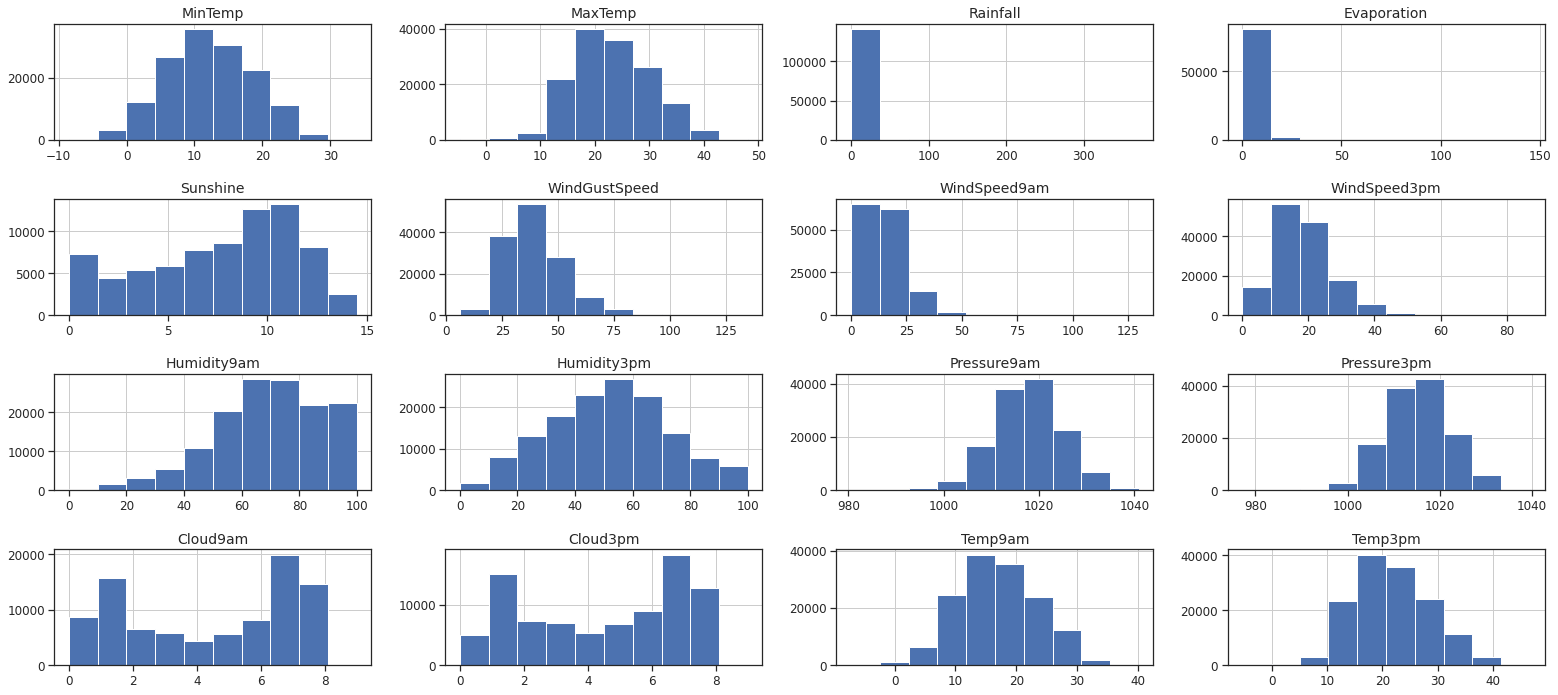

In [10]:
#Funcion para mostrar distribuciones.
def display_dataset_distributions(dataset):
    fig = dataset.hist(xlabelsize=12, ylabelsize=12,figsize=(22,10))
    [x.title.set_size(14) for x in fig.ravel()]
    plt.tight_layout()
    plt.show()
  
#Muestro la distribucion de los datos
display_dataset_distributions(dataset)

**Categóricas**: Obtener conclusiones acerca de cardinalidad, representación de cada categoría,etc

In [11]:
dataset.Date.unique() #alta cardinalidad

array(['2008-12-01', '2008-12-02', '2008-12-03', ..., '2008-01-29',
       '2008-01-30', '2008-01-31'], dtype=object)

In [12]:
dataset.Location.unique() #alta cardinalidad

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

In [13]:
dataset.WindGustDir.unique() # baja cardinalidad  

array(['W', 'WNW', 'WSW', 'NE', 'NNW', 'N', 'NNE', 'SW', nan, 'ENE',
       'SSE', 'S', 'NW', 'SE', 'ESE', 'E', 'SSW'], dtype=object)

In [14]:
dataset.WindDir9am.unique()# baja cardinalidad

array(['W', 'NNW', 'SE', 'ENE', 'SW', 'SSE', 'S', 'NE', nan, 'SSW', 'N',
       'WSW', 'ESE', 'E', 'NW', 'WNW', 'NNE'], dtype=object)

In [15]:
dataset.WindDir3pm.unique()# baja cardinalidad

array(['WNW', 'WSW', 'E', 'NW', 'W', 'SSE', 'ESE', 'ENE', 'NNW', 'SSW',
       'SW', 'SE', 'N', 'S', 'NNE', nan, 'NE'], dtype=object)

In [16]:
dataset.RainToday.unique()# baja cardinalidad

array(['No', 'Yes', nan], dtype=object)

***Conclusion segundo analisis***: Se identificaron dos variables categoricas con alta cardinalidad: Date y Location. Para la variable Date se puede hacer un tratamiento ya que, ademas, se puede considerar una variable compuesta.

(array([110316.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,  35144.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

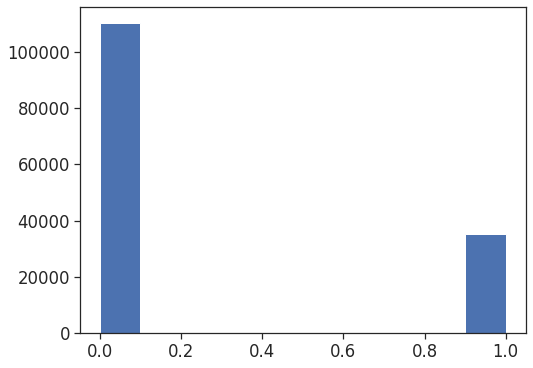

In [17]:
#veo si las clases estan balanceadas y analizo la variable de salida
fig, ax = plt.subplots(1,figsize=(8,6))
ax.hist(dataset.RainTomorrow.apply(lambda label: 0 if (label == 'No') else 1))

**Conclusion**: En el analisis realizado se puede ver que las clases estan desbalanceadas.

#Tratamiento de outliers

In [18]:
#creo una funcion para obtener los limites de una variable
def find_outliers(dataset, variables):
    
    Q1=dataset[variables].quantile(0.25)
    Q3=dataset[variables].quantile(0.75)
    IQR=Q3-Q1
    lower_boundary = Q1-1.5*IQR
    upper_boundary = Q3+1.5*IQR
    return lower_boundary, upper_boundary

In [19]:
#creo una funcion para graficar los outliers
def plot_variable(dataset, variable):
    plt.figure(figsize=(16,4))
    plt.subplot(1,2,1)
    plt.hist(dataset[variable], alpha=0.5)
    
    plt.subplot(1,2,2)
    sns.boxplot(dataset[variable])
    plt.show

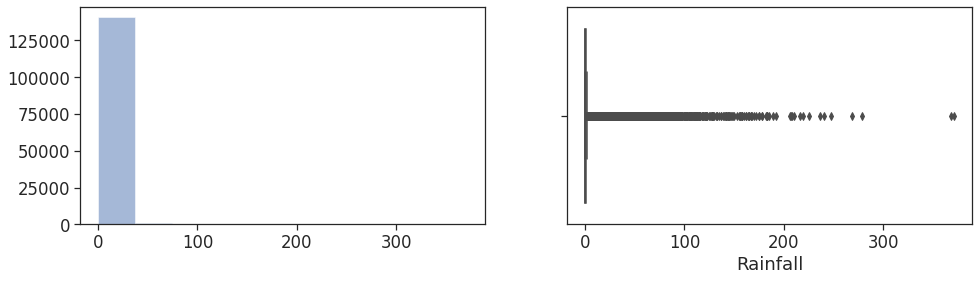

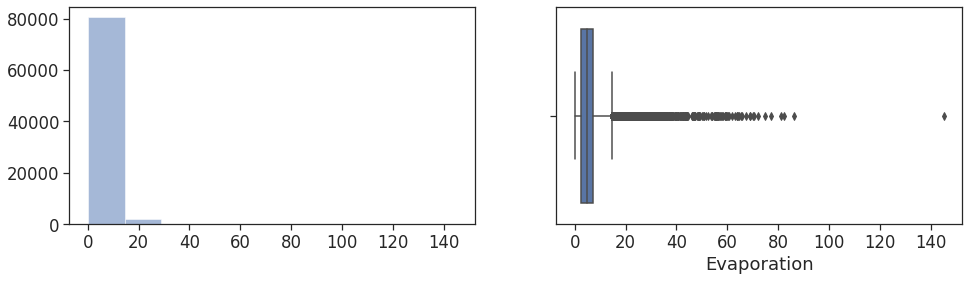

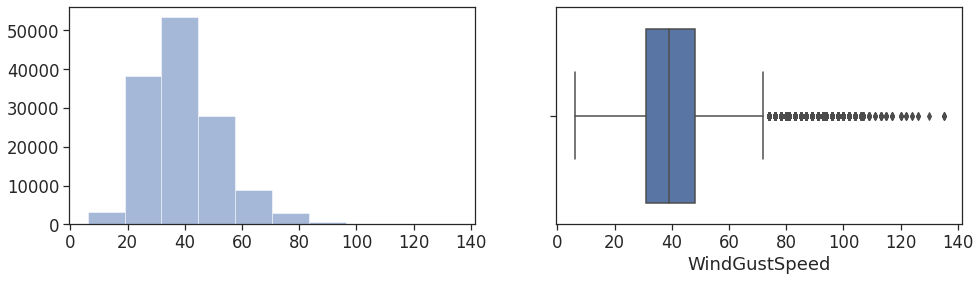

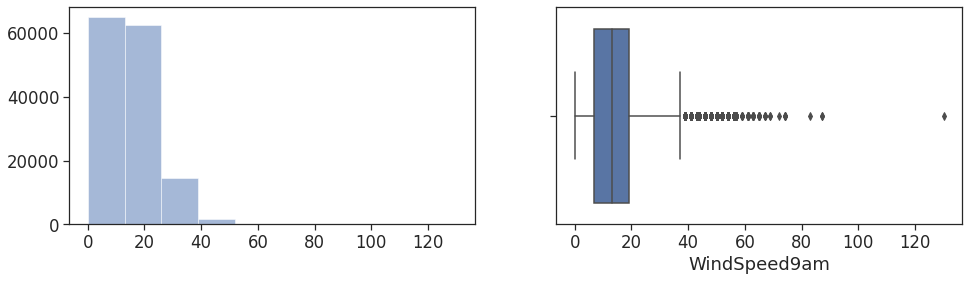

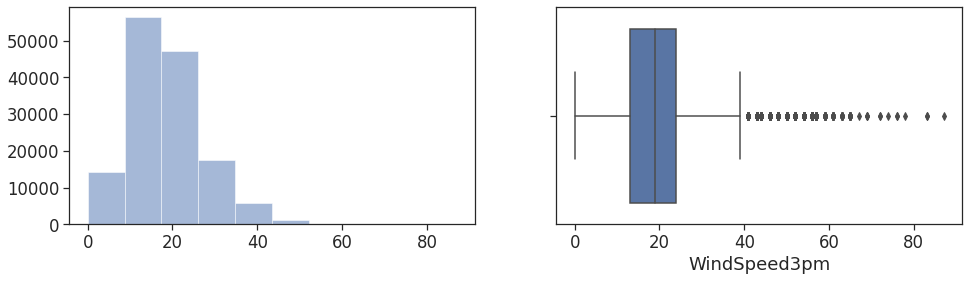

In [20]:
plot_variable(dataset, 'Rainfall')
plot_variable(dataset, 'Evaporation')
plot_variable(dataset, 'WindGustSpeed')
plot_variable(dataset, 'WindSpeed9am')
plot_variable(dataset, 'WindSpeed3pm')

In [22]:
#limite inferior y superior de la variable rainfall
lower_rainfall, upper_rainfall = find_outliers(dataset, 'Rainfall')
print('upper limit for Rainfall area is', upper_rainfall)
print('lower limit for Rainfall area is', lower_rainfall)

upper limit for Rainfall area is 2.0
lower limit for Rainfall area is -1.2000000000000002


In [23]:
outliers_rainfall = np.where(dataset['Rainfall'] > upper_rainfall, True,
                            np.where(dataset['Rainfall'] < lower_rainfall, True, False))

In [24]:
outliers_rainfall

array([False, False, False, ..., False, False, False])

In [25]:
out_rainfall = dataset.loc[~(outliers_rainfall),]

In [26]:
out_rainfall.shape

(119882, 23)

Mismo tratamiento para Evaporation

In [27]:
#limite inferior y superior de la variable evaporation
lower_evaporation, upper_evaporation = find_outliers(dataset, 'Evaporation')
print('upper limit for Evaporation area is', upper_evaporation)
print('lower limit for Evaporation area is', lower_evaporation)

upper limit for Evaporation area is 14.600000000000001
lower limit for Evaporation area is -4.600000000000001


In [28]:
outliers_evaporation = np.where(dataset['Evaporation'] > upper_evaporation, True,
                               np.where(dataset['Evaporation'] < lower_evaporation,True,False))

In [29]:
outliers_evaporation

array([False, False, False, ..., False, False, False])

In [30]:
out_evaporation = dataset.loc[~(outliers_evaporation),]

In [31]:
out_evaporation.shape

(143465, 23)

Mismo tratamiento para WindGustSpeed

In [33]:
#limite inferior y superior de la variable WindGustSpeed
lower_wgustspeed, upper_wgustspeed = find_outliers(dataset, 'WindGustSpeed')
print('upper limit for WindGustSpeed area is', upper_wgustspeed)
print('lower limit for WindGustSpeed area is', lower_wgustspeed)

upper limit for WindGustSpeed area is 73.5
lower limit for WindGustSpeed area is 5.5


In [34]:
outliers_WindGustSpeed = np.where(dataset['WindGustSpeed'] > upper_wgustspeed, True,
                               np.where(dataset['WindGustSpeed'] < lower_wgustspeed,True,False))

In [35]:
outliers_WindGustSpeed

array([False, False, False, ..., False, False, False])

In [36]:
out_WindGustSpeed = dataset.loc[~(outliers_WindGustSpeed),]

In [37]:
out_WindGustSpeed.shape

(142368, 23)

Mismo tratamiento para WindSpeed9am

In [38]:
#limite inferior y superior de la variable WindSpeed9am
lower_wspeed, upper_wspeed = find_outliers(dataset, 'WindSpeed9am')
print('upper limit for WindSpeed9am area is', upper_wspeed)
print('lower limit for WindSpeed9am area is', lower_wspeed)

upper limit for WindSpeed9am area is 37.0
lower limit for WindSpeed9am area is -11.0


In [39]:
outliers_WindSpeed9am = np.where(dataset['WindSpeed9am'] > upper_wspeed, True,
                               np.where(dataset['WindSpeed9am'] < lower_wspeed,True,False))

In [40]:
outliers_WindSpeed9am

array([False, False, False, ..., False, False, False])

In [41]:
out_WindSpeed9am = dataset.loc[~(outliers_WindSpeed9am),]

In [42]:
out_WindSpeed9am.shape

(143643, 23)

Mismo tratamiento para WindSpeed3pm

In [43]:
#limite inferior y superior de la variable WindSpeed3pm
lower_wspeedp, upper_wspeedp = find_outliers(dataset, 'WindSpeed3pm')
print('upper limit for windspeed3pm area is', upper_wspeedp)
print('lower limit for windspeed3pm area is', lower_wspeedp)
outliers_wspeedp = np.where(dataset['WindSpeed3pm'] > upper_wspeedp, True,
                               np.where(dataset['WindSpeed3pm'] < lower_wspeedp,True,False))

upper limit for windspeed3pm area is 40.5
lower limit for windspeed3pm area is -3.5


In [44]:
outliers_wspeedp

array([False, False, False, ..., False, False, False])

In [45]:
out_WindSpeed3pm = dataset.loc[~(outliers_wspeedp),]

In [46]:
out_WindSpeed3pm.shape

(142937, 23)

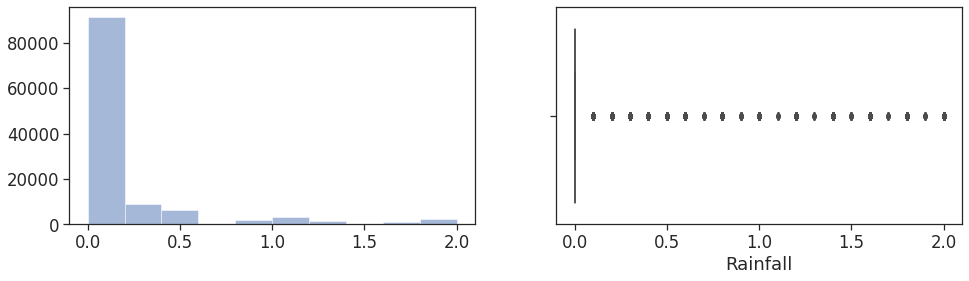

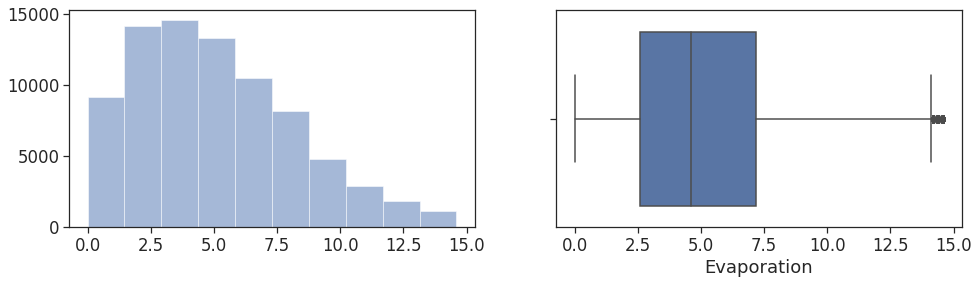

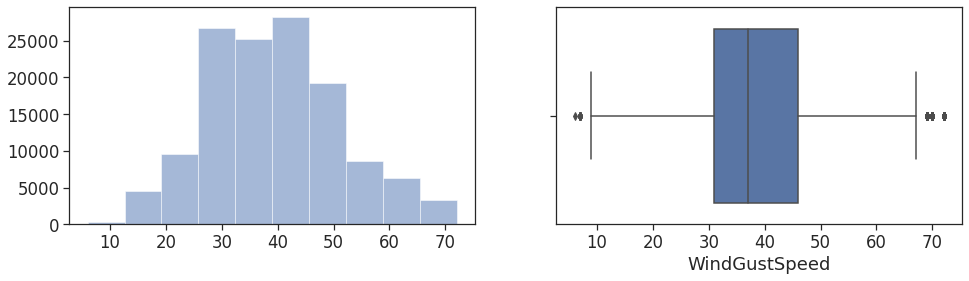

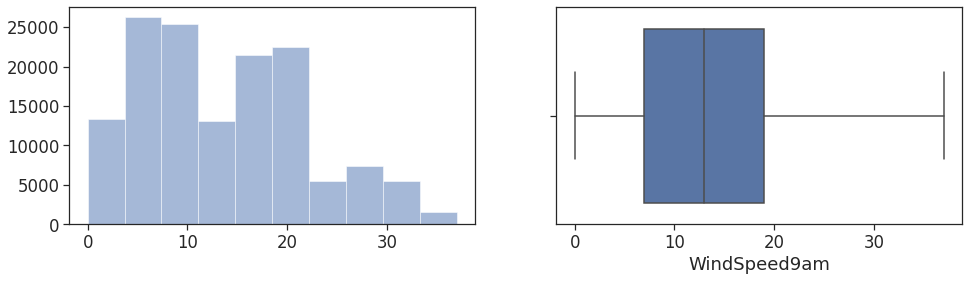

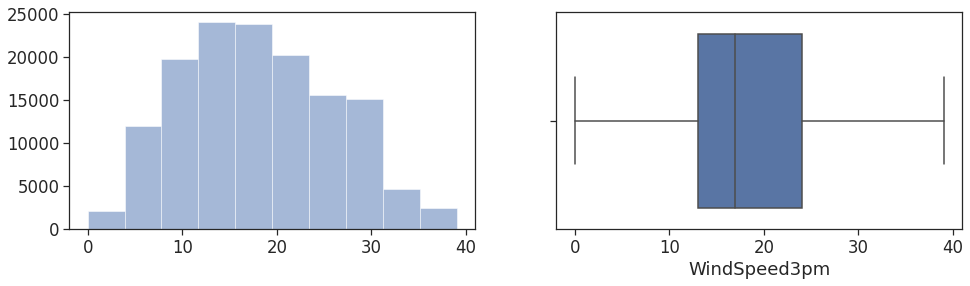

In [47]:
plot_variable(out_rainfall, 'Rainfall')
plot_variable(out_evaporation, 'Evaporation')
plot_variable(out_WindGustSpeed, 'WindGustSpeed')
plot_variable(out_WindSpeed9am, 'WindSpeed9am')
plot_variable(out_WindSpeed3pm, 'WindSpeed3pm')

#Tratamiento de NaNs con mediana y moda

In [48]:
#Tratamiento de NaNs
dataset["MinTemp"]= dataset["MinTemp"].fillna(dataset["MinTemp"].median())
dataset["MaxTemp"]= dataset["MaxTemp"].fillna(dataset["MaxTemp"].median())
dataset["Evaporation"]= dataset["Evaporation"].fillna(dataset["Evaporation"].median())
dataset["Sunshine"]= dataset["Sunshine"].fillna(dataset["Sunshine"].median())
dataset["WindGustSpeed"]= dataset["WindGustSpeed"].fillna(dataset["WindGustSpeed"].median())
dataset["Rainfall"]= dataset["Rainfall"].fillna(dataset["Rainfall"].median())
dataset["WindSpeed9am"]= dataset["WindSpeed9am"].fillna(dataset["WindSpeed9am"].median())
dataset["WindSpeed3pm"]= dataset["WindSpeed3pm"].fillna(dataset["WindSpeed3pm"].median())
dataset["Humidity9am"]= dataset["Humidity9am"].fillna(dataset["Humidity9am"].median())
dataset["Humidity3pm"]= dataset["Humidity3pm"].fillna(dataset["Humidity3pm"].median())
dataset["Pressure9am"]= dataset["Pressure9am"].fillna(dataset["Pressure9am"].median())
dataset["Pressure3pm"]= dataset["Pressure3pm"].fillna(dataset["Pressure3pm"].median())
dataset["Cloud9am"]= dataset["Cloud9am"].fillna(dataset["Cloud9am"].median())
dataset["Cloud3pm"]= dataset["Cloud3pm"].fillna(dataset["Cloud3pm"].median())
dataset["Temp9am"]= dataset["Temp9am"].fillna(dataset["Temp9am"].median())
dataset["Temp3pm"]= dataset["Temp3pm"].fillna(dataset["Temp3pm"].median())
dataset['RainToday']=dataset['RainToday'].fillna(dataset['RainToday'].mode()[0])
dataset['RainTomorrow']=dataset['RainTomorrow'].fillna(dataset['RainTomorrow'].mode()[0])
dataset['WindDir9am'] = dataset['WindDir9am'].fillna(dataset['WindDir9am'].mode()[0])
dataset['WindGustDir'] = dataset['WindGustDir'].fillna(dataset['WindGustDir'].mode()[0])
dataset['WindDir3pm'] = dataset['WindDir3pm'].fillna(dataset['WindDir3pm'].mode()[0])

In [49]:
dataset.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

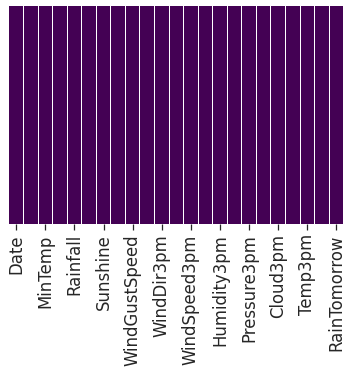

In [50]:
sns.heatmap(dataset.isnull(),yticklabels=False,cbar=False,cmap='viridis')

#One hot encoding de variables categoricas y normalizacion de variables numericas

In [51]:
y=dataset['RainTomorrow']
X=dataset.drop(labels=['RainTomorrow','Date'], axis=1)

In [52]:
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=42)

In [53]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

In [54]:
encode=OneHotEncoder()
scaler = MinMaxScaler()
from sklearn.compose import make_column_transformer, ColumnTransformer

In [55]:
X_train.select_dtypes('float').columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm'],
      dtype='object')

In [56]:
num_cols=['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm']

cat_cols=['Location','WindGustDir','WindDir9am','WindDir3pm','RainToday']

In [57]:
column_transformer1 = ColumnTransformer(
[('cat_feat',encode,cat_cols),
('num_feat',scaler,num_cols)
],
remainder='passthrough')

In [58]:
X_train=column_transformer1.fit_transform(X_train)
X_test =column_transformer1.transform(X_test)

In [59]:
y_train=y_train.apply(lambda label: 0 if (label == 'No') else 1)
y_test=y_test.apply(lambda label: 0 if (label == 'No') else 1)

In [60]:
print(y_test)

100721    1
30234     0
68427     0
28624     0
31173     0
         ..
130665    1
67453     1
19257     1
13928     0
75366     0
Name: RainTomorrow, Length: 43638, dtype: int64


# Modelos implementados

**Modelo Base**

In [61]:
class RandomModel(object):

    def fit(self, X, y):
        return None

    def predict(self, X):
        return np.random.randint(0,1, size=X.shape[0])

In [62]:
random_model = RandomModel()
random_model.fit(X_train, y_train)
rm_predictions = random_model.predict(X_test)

In [63]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, rm_predictions)
roc_auc = metrics.auc(fpr, tpr)
print(metrics.auc(fpr, tpr))

0.5


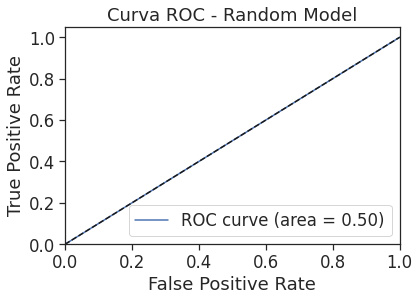

In [64]:
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC - Random Model')
plt.legend(loc="lower right")
plt.show()

**Regresion logistica**

In [67]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)
predicted=model.predict(X_test)

conf = confusion_matrix(y_test, predicted)
print ("The accuracy of Logistic Regression is : ", accuracy_score(y_test, predicted)*100, "%")


The accuracy of Logistic Regression is :  84.91681561941428 %


**XG BOOST**

In [68]:
from xgboost import XGBClassifier
xgb = XGBClassifier(max_depth=16,
                    n_estimators=1000)
xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=16,
              min_child_weight=1, missing=None, n_estimators=1000, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [69]:
probs = xgb.predict_proba(X_test)[:,1]
pred = xgb.predict(X_test)

In [70]:
from sklearn.metrics import accuracy_score , classification_report, roc_auc_score
accuracy = accuracy_score(y_test,pred)
roc_auc = roc_auc_score(y_test,probs)
print("Accuracy = {}".format(accuracy))
print("ROC score = {}".format(roc_auc))
print(classification_report(y_test,pred))

Accuracy = 0.8614510289197489
ROC score = 0.8930273284320036
              precision    recall  f1-score   support

           0       0.88      0.95      0.91     33987
           1       0.76      0.55      0.64      9651

    accuracy                           0.86     43638
   macro avg       0.82      0.75      0.78     43638
weighted avg       0.85      0.86      0.85     43638

